# Analyzing exam scores
## 📖 Background
In a large school, the school makes every student take year-end math, reading, and writing exams. The principal of the school wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The dataset has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading in the data
df = pd.read_csv('exams.csv')
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math score,reading score,writing score
0,female,group C,some college,standard,none,68,71,71
1,male,group B,bachelor's degree,standard,none,67,68,59
2,female,group C,bachelor's degree,standard,none,52,60,64
3,male,group B,some college,standard,none,84,78,71
4,male,group C,high school,standard,none,69,61,61


In [2]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.944000,69.958000,68.486000
std,14.868017,14.630047,15.189487
min,27.000000,26.000000,20.000000
25%,57.000000,60.000000,58.000000
50%,67.000000,70.000000,69.000000
75%,77.000000,81.000000,79.000000
max,100.000000,100.000000,100.000000


A column  titled **average_score** is added to the dataset. This will be used in ralation to other categorical variables in the dataset.

In [3]:
df['average_score'] =(df['math score'] + df['writing score'] + df['reading score']) / 3
df

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math score,reading score,writing score,average_score
0,female,group C,some college,standard,none,68,71,71,70.000000
1,male,group B,bachelor's degree,standard,none,67,68,59,64.666667
2,female,group C,bachelor's degree,standard,none,52,60,64,58.666667
3,male,group B,some college,standard,none,84,78,71,77.666667
4,male,group C,high school,standard,none,69,61,61,63.666667
...,...,...,...,...,...,...,...,...,...
995,male,group D,some high school,free/reduced,none,65,71,67,67.666667
996,female,group D,bachelor's degree,standard,none,66,61,70,65.666667
997,female,group B,bachelor's degree,standard,completed,74,88,87,83.000000
998,female,group C,bachelor's degree,standard,completed,67,76,83,75.333333


In [4]:
df.shape

(1000, 9)

The dataset has 1000 records

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parent_education_level', 'lunch',
       'test_prep_course', 'math score', 'reading score', 'writing score',
       'average_score'],
      dtype='object')

## 1: Average reading score for each race/ethnicity group. 

Use the `groupby` function to group the information by the column "race/ethnicity". Then select the column "reading" and use `.mean()` to get the average grade for each group:

In [6]:
df.groupby('race/ethnicity')[['reading score']].mean()

,reading score
race/ethnicity,
group A,68.304348
group B,68.613402
group C,69.665644
group D,68.840000
group E,74.614907


Students from the race/ethnicity group E have the highest average reading score, while, students from the race/ethnicity group A have the lowest average reading score.

## Data visualization
## 2: Average writing score by lunch group and gender

Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.
The `seaborn` library is use for this. Also, the `catplot()` function is use on the data to be displayed.

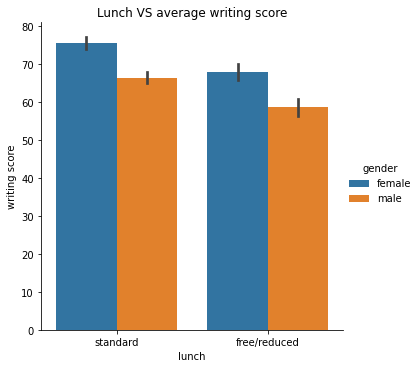

In [7]:
sns.catplot(x='lunch', y='writing score', hue='gender', data=df, kind='bar').set(title='Lunch VS average writing score');

Students with standard lunch happened to have higher average writing score compare to  students with free or reduced lunch. The female students performed better than their male counterparts.

## Exploratory Data Analysis
## 3: Avarage reading scores
Average reading scores for students with/without the test preparation course

In [8]:
#Use the groupby founction
df.groupby('test_prep_course')[['reading score']].mean()

,reading score
test_prep_course,
completed,75.207547
none,67.510264


## 4: Avarage scores for different parental levels
Average scores for the different parental education levels

In [9]:
df.groupby('parent_education_level') [['math score', 'reading score', 'writing score']].mean()
# df.groupby('parent_education_level') [['reading']].mean()

,math score,reading score,writing score
parent_education_level,,,
associate's degree,68.250000,71.239796,69.831633
bachelor's degree,71.433071,73.850394,73.748031
high school,63.851064,66.760638,64.595745
master's degree,73.652778,77.736111,77.388889
some college,67.383260,70.629956,69.634361
some high school,62.589474,65.447368,62.684211


## 5: Visualize  the average reading scores
Visualize  the average reading scores for students with/without the test preparation course

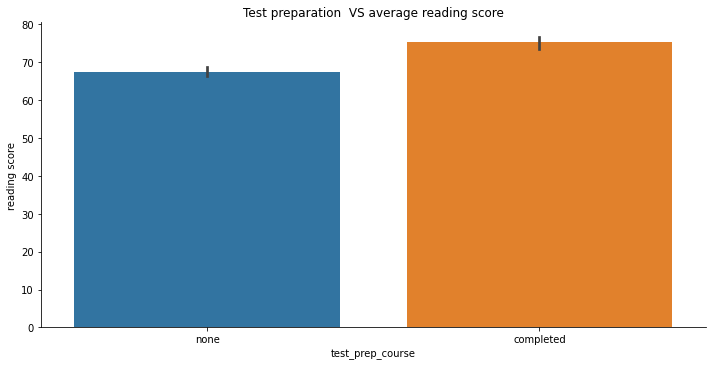

In [10]:
# #
sns.catplot(x='test_prep_course', y='reading score', data=df, kind='bar', aspect=2).set(title='Test preparation  VS average reading score');



Studens who completed their test preparation course performed better than those who did not.

## 6: Visualise  the average score
Visulaise the average score with respect to parental education levels

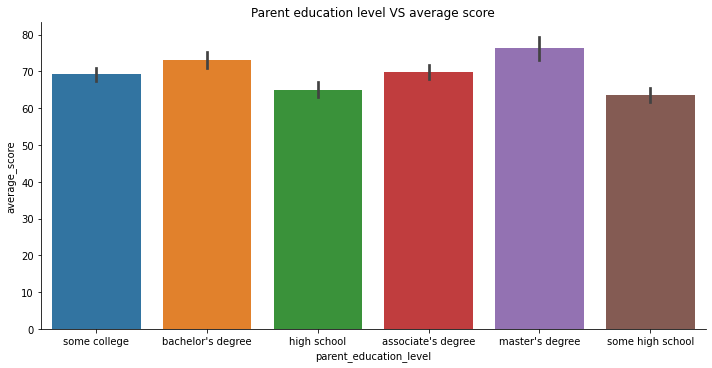

In [11]:
sns.catplot(x='parent_education_level', y='average_score', data=df, kind='bar', aspect=2).set(title='Parent education level VS average score');



It can be deduced that the higher the parent education level, the better the student performance.

## 7: Compare the average scores for students with/withoout test preparation course for different parent education levels.

In [12]:
df_1 = df.groupby(['parent_education_level', 'test_prep_course'])[['math score', 'reading score', 'writing score']].mean()
df_1.sort_values('math score', ascending = False)

math score  reading score  \
parent_education_level test_prep_course                              
master's degree        completed          74.764706      81.411765   
                       none               73.309091      76.600000   
bachelor's degree      completed          72.651163      77.000000   
associate's degree     completed          72.028571      76.014286   
bachelor's degree      none               70.809524      72.238095   
some college           completed          70.562500      76.050000   
high school            completed          68.928571      73.285714   
some high school       completed          68.653846      71.384615   
associate's degree     none               66.150794      68.587302   
some college           none               65.653061      67.680272   
high school            none               61.696970      63.992424   
some high school       none               60.304348      63.210145   

                                         writing score  
parent_education_level test_prep_course                 
master's degree        completed             83.588235  
                       none                  75.472727  
bachelor's degree      completed             78.116279  
associate's degree     completed             76.342857  
bachelor's degree      none                  71.511905  
some college           completed             76.650000  
high school            completed             74.535714  
some high school       completed             70.038462  
associate's degree     none                  66.214286  
some college           none                  65.816327  
high school            none                  60.378788  
some high school       none                  59.913043

## 8: Correlations among the 3 subjects

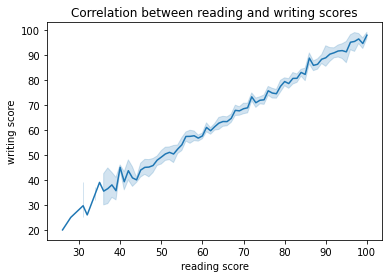

In [13]:
sns.lineplot(x = 'reading score', y = 'writing score', data = df).set(title='Correlation between reading and writing scores');

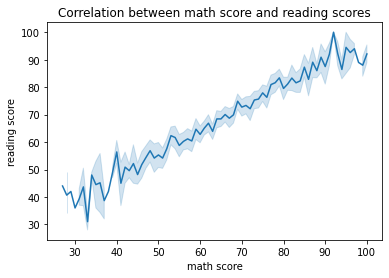

In [14]:
sns.lineplot(x = 'math score', y = 'reading score', data = df).set(title='Correlation between math score and reading scores');

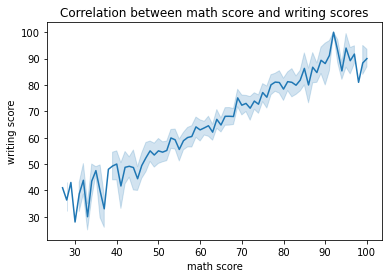

In [15]:
sns.lineplot(x = 'math score', y = 'writing score', data = df).set(title='Correlation between math score and writing scores');

The 3 graphs above shows that scores follow a linear correlation with each othe.

In [16]:
df[df['average_score'] == 100]

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math score,reading score,writing score,average_score
244,female,group E,associate's degree,standard,none,100,100,100,100.0
947,female,group E,associate's degree,standard,completed,100,100,100,100.0


Only 3 students recorded 100 makrs in all the 3 subjects, among which 2 are females. The 3 of them also belong to the same race/ethnicity, group E

## KEY INSIGHTS
1: Deduction could be made that, students whose parents have higher educational level tends to perform better than their fellow counterparts with parents of lower educational level.<br>
2: Students who performs better in one subject, tends to also perform better in other subjects.<br>
3: Students who completed the test preparation course have higher marks than the ones who did not, perhaps, the test preparation have significant impact on overall student performance.<br>
4: Only three students (1 male and 2 females) recorded 100% marks in all the 3 subjects. And they all belong to the same race/ethnicity, group E. Also, out of the three students, only one student (who happened to be a male) has completed the test preparation course. They all have their lunch to be in the standard category.

## CONCLUSION 
This analysis has shown that, there are different factors responsible for student performance in exams, these factors ranging from; parental level of education, socio-economic factor, preparation for test among others. However, there are some exceptional cases where students with a low parental level of education scoring 100% marks across the 3 subjects. Similarly, some students did not completed their test preparation courses and they scored full marks in all their subjects. Perhaps, these set of students may have their own unique ways for test preparations.
Some students with Socio-economic disadvantage also appears to performed very well, perhaps these categories of students did not allow economic challenges to sabotage their efforts.<br>
Generally, there are many factors responsible for students’ performances and their level of effects differs.<br>
**NB** There are other factors that can be considered as well, but they were not captured in the dataset. These factors includes type of facilities in school, methods of teaching, access to internet, peer group, hours of study, home lesson, teacher's qualifications and many more. These factors could have significant impact on student performance.